In [248]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1) Formulate question

## 2) Gather data

### Background info:

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

#### Variables (in order):
- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 
otherwise)
- **NOX**: Nitric oxides concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centres
- **RAD**: Index of accessibility to radial highways
- **TAX**: Full-value property-tax rate per $10,000
- **PTRATIO**: Pupil-teacher ratio by town
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000's (target 
variable)

In [222]:
data_url = "http://lib.stat.cmu.edu/datasets/boston" # Source of the data
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

df = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT', 'MEDV'] # Names of the features and label
df = pd.DataFrame(features, columns=columns)
df.shape # Number of data points (rows) and features (columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 3) Clean/preprocess data

In [223]:
# 1) Remove null rows

df.isnull().sum() # Number of missing values
df.dropna(inplace=True)

# 2) Remove duplicates

df.drop_duplicates(inplace=True)

df.shape

(506, 14)

# 4) Visualize data

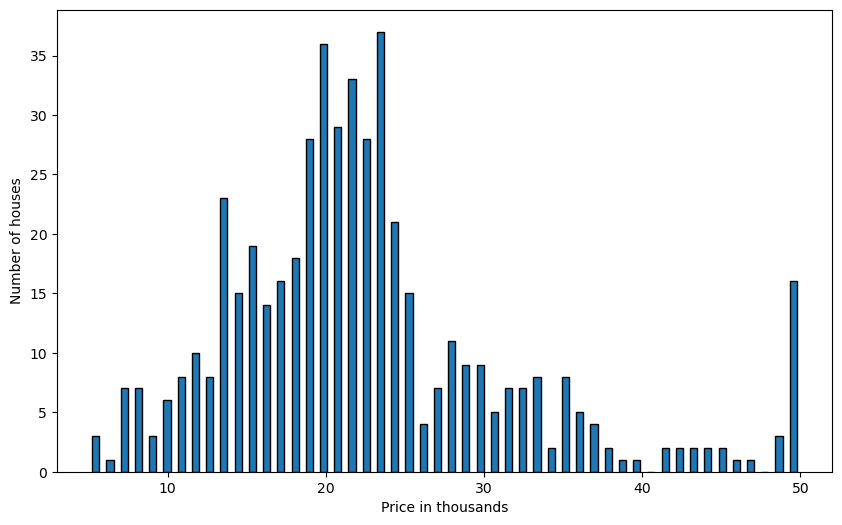

In [225]:
plt.figure(figsize=(10, 6))
plt.hist(df['MEDV'], bins=50, ec='black', rwidth=0.5)
plt.xlabel('Price in thousands')
plt.ylabel('Number of houses')
plt.show()

<Figure size 1000x600 with 0 Axes>

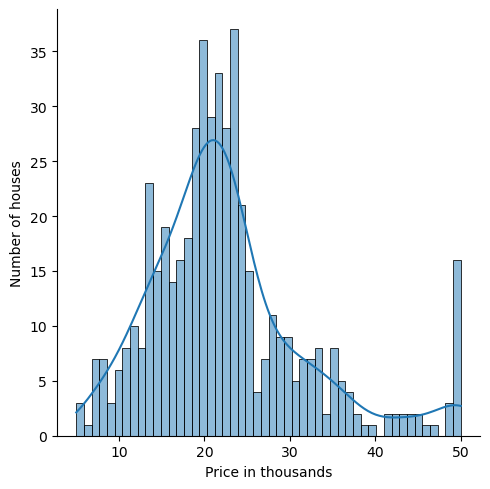

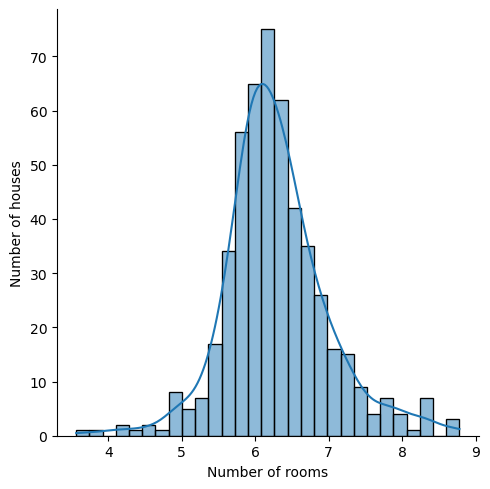

In [226]:
plt.figure(figsize=(10, 6))

sns.displot(df['MEDV'], bins=50, kde=True)
plt.xlabel('Price in thousands')
plt.ylabel('Number of houses')

sns.displot(df_features['RM'], kde=True)
plt.xlabel('Number of rooms')
plt.ylabel('Number of houses')
plt.show()

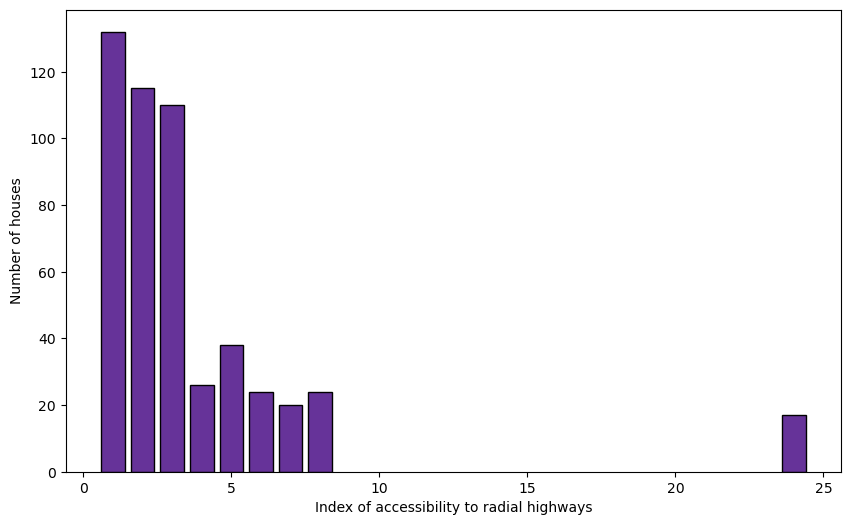

In [227]:
indices = df['RAD'].unique()
frequency = df['RAD'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(indices, frequency, ec='black', color="#663399")
plt.xlabel('Index of accessibility to radial highways')
plt.ylabel('Number of houses')
plt.show()

## Descriptive Statistics

In [228]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Inferential Statistics

### Correlation

#### $$ \rho _{XY} = Corr(XY) $$
#### $$ -1.0 \leq rho _{XY} \leq +1.0 $$

In [235]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [240]:
mask = np.zeros_like(df.corr())
upper_triangle = np.triu_indices_from(mask)
mask[upper_triangle] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

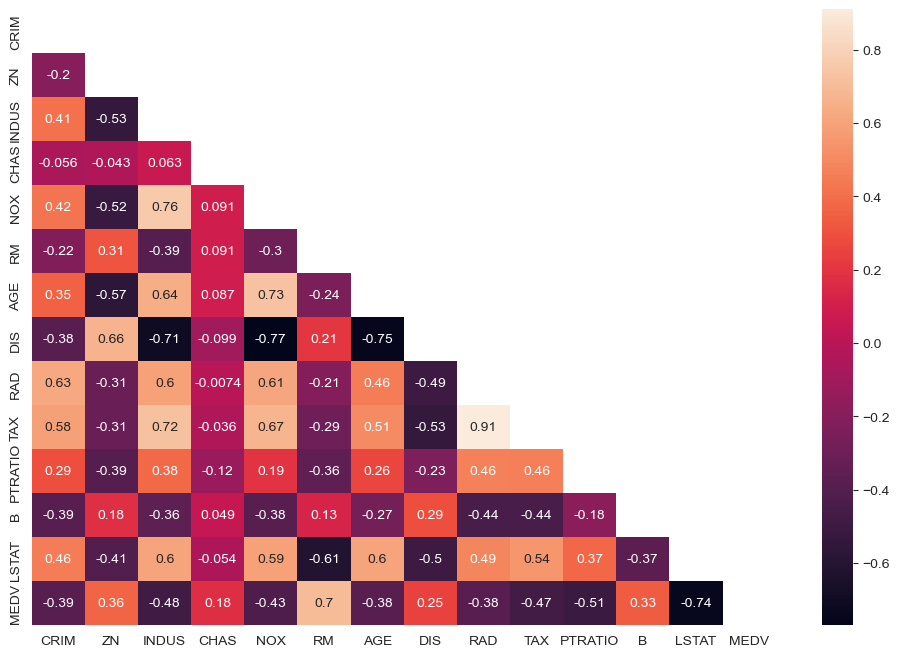

In [245]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), mask=mask, annot=True)
sns.set_style('white')
plt.show()

## Training & testing sets

In [251]:
features = df.drop('MEDV', axis=1)
target = df['MEDV']
features.head()

# Features is the first array; target is second.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10) 